# Analysis Process from Data Retrieval

This system program have rule in path hierarchy.

```
<data folder>/:
|
|--<folder name>/:
|----<Rcal>ohm (1).csv
|----<Rcal>ohm (2).csv
|----<Rcal>ohm (<i>).csv
|----<gripX> (<i>).csv
|----<gripY> (<i>).csv
|
|--<another folder>/:
|----<another file>.csv
|
```

In this notebook, I want to try for single folder in secondary level. For full system program, it will works for multiple folder actually. 

Check the main program at [**`olah_repetisi_rc.py`**](./olah_repetisi_rc.py)

### Import Library

In [1]:
import os
import pandas as pd

from processing import *
from formula import *
import json_function as fjson
from graph import *
from post_process import *
import internal_factor as infac

### Define Global Variable

In [2]:
data_path = "E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/hand to hand"
folder_name = ["data variasi grip/"]
folder_path = folder_name.copy()

fstart = 20e3
fend = 50e3

internal_flag = True

In [3]:
i = 0
for f in folder_path:
    folder_path[i] = os.path.join(data_path, f)
    print(folder_path[i])
    i += 1

E:/_TUGAS/_ITBOneDrive/OneDrive - Institut Teknologi Bandung/_Kuliah/_sem7/7_kerja praktek/data/hand to hand\data variasi grip/


In [4]:
# prepare tmp files
fjson.initialize_retrieval_tmp_files()

Initialize tmp files ... Done


### Prepare Dataframes

`files, dfs, dfs_list = prepare_data(folder_path_i)`

In [5]:
folder_path_i = folder_path[0]

# scan all files
path, dirs, files = next(os.walk(folder_path_i))

for file in files:
    print(file)

g1 (1).csv
g1 (2).csv
g1 (3).csv
g1 (4).csv
g1 (5).csv
g2 (1).csv
g2 (2).csv
g2 (3).csv
g2 (4).csv
g2 (5).csv
g3 (1).csv
g3 (2).csv
g3 (3).csv
g3 (4).csv
g3 (5).csv
g4 (1).csv
g4 (2).csv
g4 (3).csv
g4 (4).csv
g4 (5).csv
t1 (1).csv
t1 (2).csv
t1 (3).csv
t1 (4).csv
t1 (5).csv


In [6]:
# append datasets to the list
dfs = {}
for fn in files:
    path = folder_path_i + fn
    temp_df = pd.read_csv(path)
    dfs[fn[:-4]] = temp_df

dfs_list = list(dfs.values())

print( dfs_list[0].head() )
# print(dfs)

   Frequency   Impedance      Phase  Real  Imaginary    Magnitude  Unnamed: 6
0      20000  836.660761 -20.930089  -144      -1145  1154.019497         NaN
1      21000  826.120888 -20.405317  -121      -1161  1167.288311         NaN
2      22000  822.304024 -19.820377   -99      -1174  1178.166796         NaN
3      23000  817.458235 -19.457671   -77      -1183  1185.503269         NaN
4      24000  810.869618 -19.189914   -56      -1192  1193.314711         NaN


In [7]:
# delete column contains NaN
for df in dfs_list:
    # get column name
    column_list = []
    for col in df.columns:
        column_list.append(col)
    
    # delete column after "Magnitude"
    # "Magnitude" in index 5
    for i in range(len(column_list)):
        if i > 5: del df[column_list[i]]

print( dfs_list[0].head() )
# print(dfs)

   Frequency   Impedance      Phase  Real  Imaginary    Magnitude
0      20000  836.660761 -20.930089  -144      -1145  1154.019497
1      21000  826.120888 -20.405317  -121      -1161  1167.288311
2      22000  822.304024 -19.820377   -99      -1174  1178.166796
3      23000  817.458235 -19.457671   -77      -1183  1185.503269
4      24000  810.869618 -19.189914   -56      -1192  1193.314711


### Create Actual Params Columns (If Considering Internal Factor)

In [8]:
if internal_flag: 
    dfs_list = create_actual_params_columns(dfs_list)

### Preprocessing of Every Dataframe

```md
variation_str, variation_data = preprocessing_data_retrieval(files)
```

In here, I dont need `variation_data`

In [9]:
# extract the every variation
variation_str = []
for f in files:
    if f[:-8] not in variation_str:
        variation_str.append( f[:-8] )

print(variation_str)

['g1', 'g2', 'g3', 'g4', 't1']


### Calculate `data_mid` and `data_avg`

In [10]:
iteration = len(dfs_list) // len(variation_str)
fmid = find_fmid_from_data_retrieval(dfs_list)

print(iteration)
print(fmid)

5
35000


### Prepare Folder for Storing Result

`saved_dirname = prepare_result_folder(data_path)`

In [11]:
saved_dirname = prepare_result_folder(data_path)

print(saved_dirname)

hand to hand/


### Plot Iteration Data

```md
graph_per_variation(variation_str, iteration, dfs_list, folder_path_i, saved_dirname,
                    x_data"", y_data="",
                    x_label="", y_label="",
                    suptitle_prefix="")
```

I want to get some graph:
- impedance error vs frequency
- impedance vs frequency
- phase vs frequency

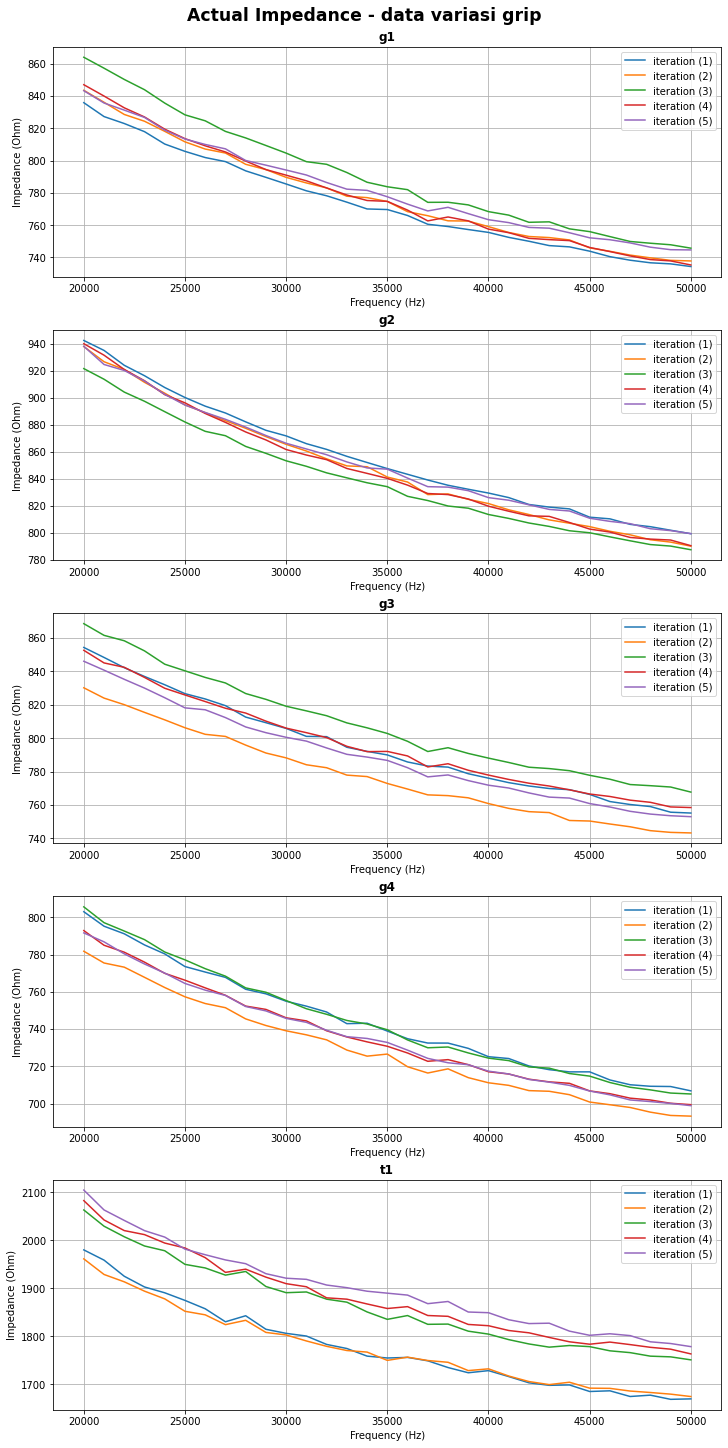

Saving Actual Impedance - data variasi grip ... Done


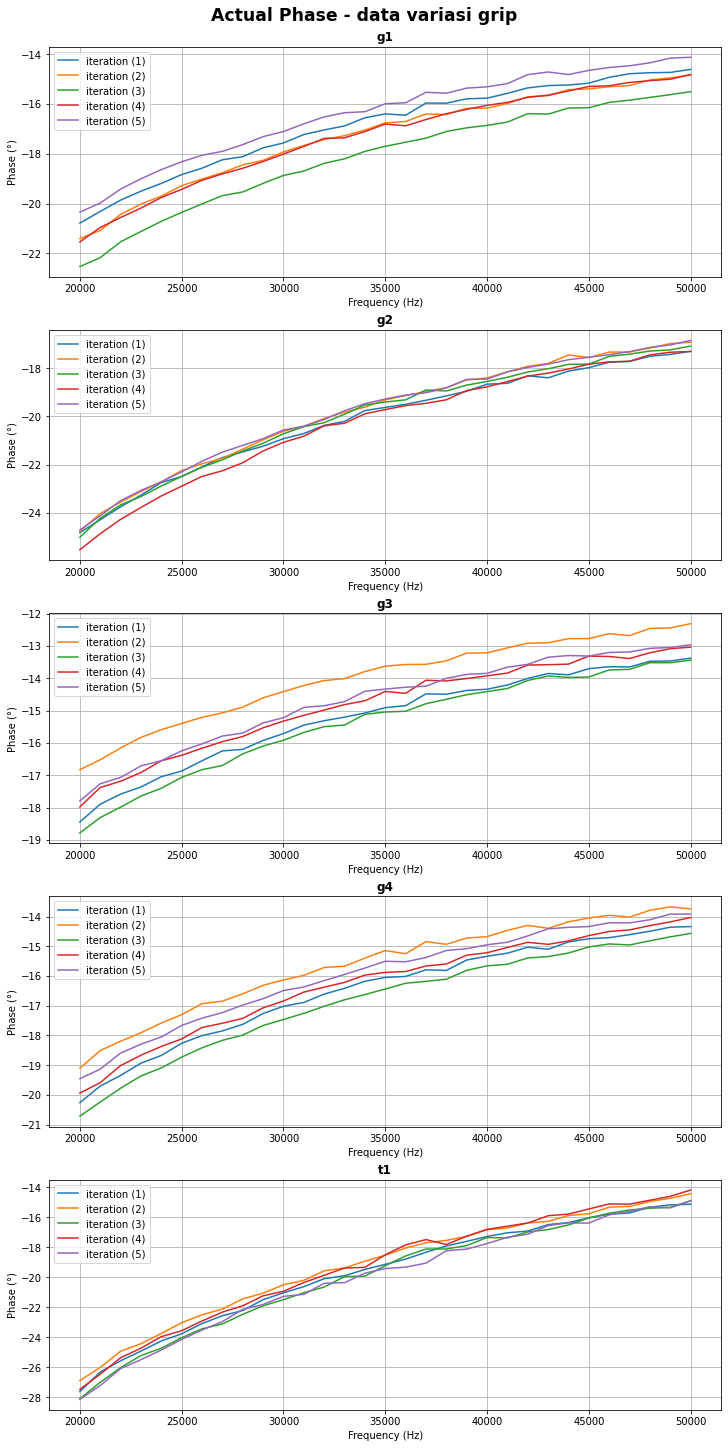

Saving Actual Phase - data variasi grip ... Done


In [12]:
def build_graph_per_variation(variation_str, iteration, dfs_list, folder_path_i, saved_dirname):
    if not(internal_flag):
        # plot & save figure
        graph_per_variation(variation_str, iteration, dfs_list, folder_path_i, saved_dirname,
                        x_data="Frequency", y_data="Impedance",
                        x_label="Frequency (Hz)", y_label="Impedance (Ohm)",
                        suptitle_prefix="Impedance")
        graph_per_variation(variation_str, iteration, dfs_list, folder_path_i, saved_dirname,
                        x_data="Frequency", y_data="Phase",
                        x_label="Frequency (Hz)", y_label="Phase (°)",
                        suptitle_prefix="Phase")
    elif internal_flag:
        # plot & save figure
        graph_per_variation(variation_str, iteration, dfs_list, folder_path_i, saved_dirname,
                        x_data="Frequency", y_data="Actual Z",
                        x_label="Frequency (Hz)", y_label="Impedance (Ohm)",
                        suptitle_prefix="Actual Impedance")
        graph_per_variation(variation_str, iteration, dfs_list, folder_path_i, saved_dirname,
                        x_data="Frequency", y_data="Actual Phase",
                        x_label="Frequency (Hz)", y_label="Phase (°)",
                        suptitle_prefix="Actual Phase")


build_graph_per_variation(variation_str, iteration, dfs_list, folder_path_i, saved_dirname)

### Get Median Value from Every Dataframe

```md
arr_z_mid, arr_phase_mid, dfs_list = get_data_mid(dfs_list, iteration)
```

Data will be saved in [`retrieval.json`](../tmp/retrieval.json).

In [13]:
# get z_mid & phase_mid from every dataframe. data_mid is data at fmid
# arr = [[...], [...], ...]
arr_z_mid, arr_phase_mid, dfs_list = get_data_mid(dfs_list, iteration)

print(arr_z_mid, end="\n\n")
print(arr_phase_mid)

[[769.6585629070576, 774.6469412256426, 783.7599954095996, 774.7271642710937, 777.5820491603736], [847.5409363929776, 841.2652866840016, 834.1344410548636, 840.2960189670487, 847.1085548377156], [790.0026809719096, 772.9172713886036, 802.8625460572416, 792.1019032089076, 786.7224866526956], [738.9190606398156, 726.5659544900386, 739.6232286554206, 730.7536819900137, 732.8185501817146], [1754.6880610966605, 1749.7319085117106, 1835.1441588522605, 1857.7244860892606, 1889.6464061337206]]

[[-16.392649316747615, -16.757525289107814, -17.696829411331116, -16.802986850713715, -15.985402636458014], [-19.630242167026914, -19.314809151156915, -19.406518179337414, -19.719924990768316, -19.280273372467814], [-14.905178531021614, -13.624101028441514, -15.039892216901114, -14.404455402007613, -14.330528158487814], [-16.047883075582014, -15.143232279472713, -16.437743327177817, -15.877493389715413, -15.502727787324313], [-19.142612430383714, -18.531260689466716, -19.235265662988315, -18.50867756832

### Get Averaged Curve per Variation

```md
df_choosen = build_df_choosen(dfs_list, iteration)
```

I want to normalize all iteration and only have one curve that represents all of the iteration data.

In [14]:
# build new dataframe

# array of averaged dataframe from every iteration
df_choosen = build_df_choosen(dfs_list, iteration)

print(len(df_choosen))
for i in range(len(df_choosen)):
    print(variation_str[i])
    print(df_choosen[i].head())
    print()

5
g1
   Frequency   Impedance      Phase   Real  Imaginary    Magnitude  \
0    20000.0  847.526974 -21.466607 -152.6    -1129.0  1139.361365   
1    21000.0  838.104176 -20.990271 -130.8    -1143.2  1150.757303   
2    22000.0  832.488277 -20.321273 -107.8    -1158.8  1163.893594   
3    23000.0  827.524919 -19.921135  -85.4    -1168.0  1171.207216   
4    24000.0  821.074806 -19.599033  -63.6    -1176.8  1178.601816   

     Actual Z  Actual Phase  
0  846.683040    -21.319028  
1  839.204182    -20.900522  
2  833.103576    -20.360937  
3  827.950095    -19.963555  
4  820.416565    -19.597795  

g2
   Frequency   Impedance      Phase   Real  Imaginary    Magnitude  \
0    20000.0  936.909852 -25.121988 -203.0    -1010.4  1030.604730   
1    21000.0  925.266235 -24.401200 -180.0    -1026.6  1042.274491   
2    22000.0  917.486459 -23.715337 -160.0    -1043.8  1056.003937   
3    23000.0  909.639309 -23.273511 -139.8    -1056.2  1065.422152   
4    24000.0  901.790739 -22.877841 -119

### Single Graph for Every Variation

```md
single_graph_from_df_choosen(df_choosen, variation_str, folder_path_i, saved_dirname,
                                x_data="", y_data="",
                                x_label="", y_label="",
                                suptitle_prefix="SG Impedance")
```

By that function, I want to get a graph that contains n curves (for every variation C).

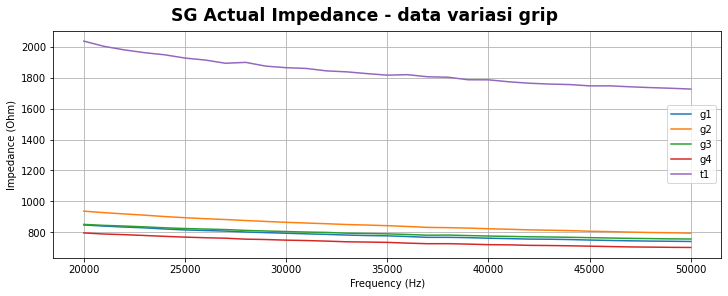

Saving SG Actual Impedance - data variasi grip ... Done


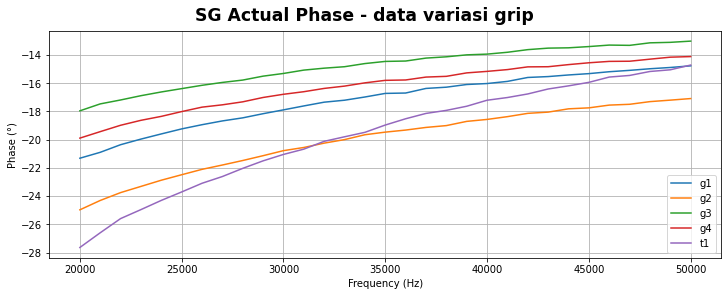

Saving SG Actual Phase - data variasi grip ... Done


In [15]:
def build_single_graph_from_df_choosen(df_choosen, variation_str, folder_path_i, saved_dirname):
    if not(internal_flag):
        # plot & save figure
        single_graph_from_df_choosen(df_choosen, variation_str, folder_path_i, saved_dirname,
                                    x_data="Frequency", y_data="Impedance",
                                    x_label="Frequency (Hz)", y_label="Impedance (Ohm)",
                                    suptitle_prefix="SG Impedance")

        single_graph_from_df_choosen(df_choosen, variation_str, folder_path_i, saved_dirname,
                                    x_data="Frequency", y_data="Phase",
                                    x_label="Frequency (Hz)", y_label="Phase (°)",
                                    suptitle_prefix="SG Phase")
    elif internal_flag:
        # plot & save figure
        single_graph_from_df_choosen(df_choosen, variation_str, folder_path_i, saved_dirname,
                                    x_data="Frequency", y_data="Actual Z",
                                    x_label="Frequency (Hz)", y_label="Impedance (Ohm)",
                                    suptitle_prefix="SG Actual Impedance")

        single_graph_from_df_choosen(df_choosen, variation_str, folder_path_i, saved_dirname,
                                    x_data="Frequency", y_data="Actual Phase",
                                    x_label="Frequency (Hz)", y_label="Phase (°)",
                                    suptitle_prefix="SG Actual Phase")


build_single_graph_from_df_choosen(df_choosen, variation_str, folder_path_i, saved_dirname)

### Save Mid Value from `averaged_dataframe`

```md
arr_z_avg, arr_phase_avg = get_z_phase_avg_from_df_choosen(df_choosen)
```

In [16]:
# store data_avg of parameter: z, phase. Stored to retrieval.json
arr_z_avg, arr_phase_avg = get_z_phase_avg_from_df_choosen(df_choosen)

print(arr_z_avg, end="\n\n")
print(arr_phase_avg)

[776.0749425947533, 842.0690475873214, 788.9213776558715, 733.7360951914006, 1817.3870041367227]

[-16.727078700871655, -19.470353572151474, -14.460831067371933, -15.801815971854456, -18.968231456400353]


### Calculate R and C based on Zavg and Cavg

```md
arr_r, arr_c = get_rc_value(arr_z_avg, arr_phase_avg, fmid)
```

This represent as R and C from data retrieval (averaged data).

In [17]:
arr_r, arr_c = get_rc_value(arr_z_avg, arr_phase_avg, fmid)

print(arr_r, end="\n\n")
print(arr_c)

[810.3642263118243, 893.1443221264359, 814.7332845210059, 762.5534766620207, 1921.7394823538998]

[1.6863941368508358e-09, 1.7999669837566657e-09, 1.4393565025221763e-09, 1.6876290015690613e-09, 8.132922208426153e-10]


### Save Important Information to JSON File

In [18]:
update_retrieval_overview_json(files, iteration, variation_str)
update_retrieval_variation_json(variation_str,
                        arr_z_mid, arr_phase_mid,
                        arr_z_avg, arr_phase_avg,
                        arr_r, arr_c)

Writing tmp/retrieval_overview.json ... Done
Writing tmp/retrieval_variation.json ... Done


### Naming Conditioning (If considering internal factor)

In [19]:
# change filename if considering internal factor
fn1, fn2, fn3 = naming_conditioning_for_image_and_markdown()

### Tabulate `retrieval_variation.json` as Dataframe

In the JSON file, I using format like this below. Check in [**`json_function.py`**](./json_function.py)

```python
    retrieval_variation_obj = \
    {
        "variation_name": {
            "z_mid": [],    # from data retrieval. for every iteration
            "z_avg": None,  # from data retrieval
            "phase_mid": [],
            "phase_avg": None,
            "r_avg": None,  # from "z_avg" and "phase_avg"
            "c_avg": None
        }
    }
```

Call this after `process_analysis()`

```md
df_z_phase, df_r_c = prepare_df_from_rc_variation_json()
```

In [20]:
header = ["Variation", "Z (Ohm)", "\u03C6 (°)", "R (Ohm)", "C (Farad)"]
data_key = ["variation", "z_avg", "phase_avg", "r_avg", "c_avg"]
df_params = build_df_from_file_json(header, data_key, file_path="tmp/retrieval_variation.json")

df_params

,Variation,Z (Ohm),φ (°),R (Ohm),C (Farad)
0,g1,776.075,-16.727,810.364,1.69e-09
1,g2,842.069,-19.470,893.144,1.80e-09
2,g3,788.921,-14.461,814.733,1.44e-09
3,g4,733.736,-15.802,762.553,1.69e-09
4,t1,1817.387,-18.968,1921.739,8.13e-10


### Save Dataframe as Image

Saving TB Actual Parameters.jpg ... Done


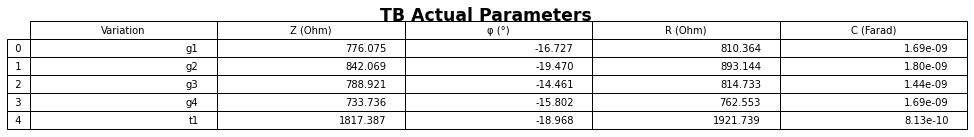

In [21]:
save_df_as_image(df_params, filename=fn1, saved_dirname=saved_dirname)

### Tabulate Dataframe in Markdown File

I choose to display the table in markdown file because it more readible easily.

In [22]:
create_markdown_table_from_dataframe(df_params, filename=fn1, saved_dirname=saved_dirname)

Build table in TB Actual Parameters.md ... Done


Check the result:\
[**`TB Parameters.md`**](../media/hand%20to%20hand/TB%20Parameters.md)

### Calculate Body Composition

In [23]:
# input
w = 57
h = 168
y = 21
s = 1

w, h, y, s = input_user()

In [24]:
# update retrieval_body_composition.json
update_retrieval_body_composition_json(w, h, y, s)

Writing tmp/retrieval_body_composition.json ... Done


### Create Dataframe from `retrieval_body_composition.json`

In [25]:
# create dataframe from final retrieval_variation.json
header = ["ID", "FFM (kg)", "FFM (%)", "FM (kg)", "FM (%)", "TBW (kg)", "TBW (%)"]
data_key = ["id", "ffm", "ffm_percentage", "fm", "fm_percentage", "tbw", "tbw_percentage"]
df_bc = build_df_from_file_json(header, data_key, file_path="tmp/retrieval_body_composition.json")

df_bc

,ID,FFM (kg),FFM (%),FM (kg),FM (%),TBW (kg),TBW (%)
0,g1,44.656,76.993,13.344,23.007,32.599,56.205
1,g2,43.520,75.034,14.480,24.966,31.769,54.775
2,g3,44.420,76.586,13.580,23.414,32.426,55.908
3,g4,45.493,78.436,12.507,21.564,33.210,57.258
4,t1,36.348,62.669,21.652,37.331,26.534,45.748


### Save Dataframe as Image

Saving TB Actual Body Composition.jpg ... Done


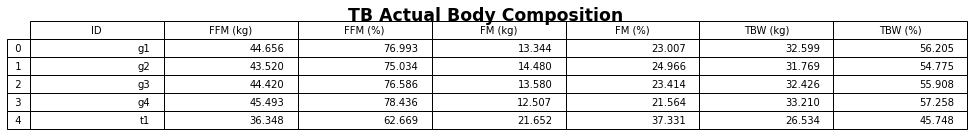

In [26]:
save_df_as_image(df_bc, filename=fn2, saved_dirname=saved_dirname)

### Save Dataframe as Markdown File

In [27]:
create_markdown_table_from_dataframe(df_bc, filename=fn2, saved_dirname=saved_dirname)

Build table in TB Actual Body Composition.md ... Done


Check the result at:\
[**`TB Body Composition.md`**](../media/hand%20to%20hand/TB%20Body%20Composition.md)

### Visualization of Body Composition

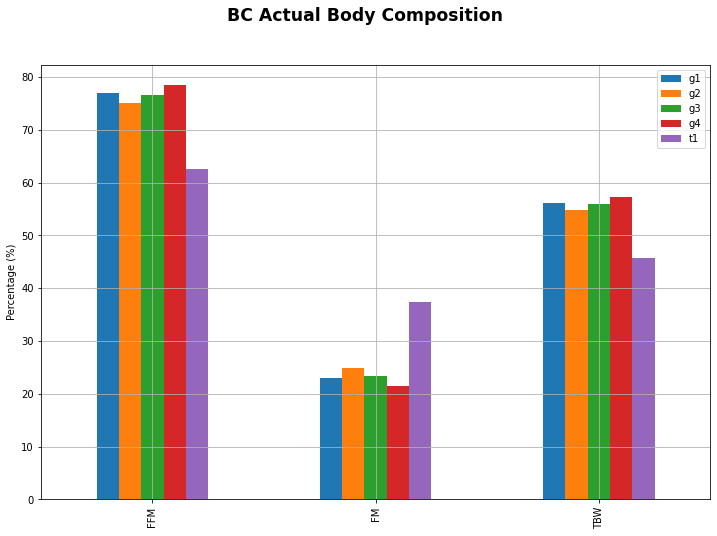

Saving BC Actual Body Composition.jpg ... Done


In [28]:
graph_overview_body_composition(saved_dirname, suptitle_text=fn3)